Problem statement

Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to daetermine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.


Import libraries

In [93]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load and read datasets

In [94]:
#Load datasets
train=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Agriculture/master/train_yaOffsB%20-%20train_yaOffsB.csv")
test=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Agriculture/master/test_pFkWwen%20-%20test_pFkWwen.csv")
sample_sub=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Agriculture/master/sample_submission_O1oDc4H%20-%20sample_submission_O1oDc4H.csv")

In [95]:
train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [96]:
test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
59305,F00155937,3337,1,0,2,20,34.0,12,1
59306,F00155940,3516,1,0,2,20,32.0,10,2
59307,F00155941,3702,1,0,2,10,NaN,48,1
59308,F00155943,3702,1,0,2,10,28.0,17,2


In [97]:
sample_sub

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1
...,...,...
59305,F00155901,1
59306,F00155912,1
59307,F00155930,1
59308,F00155933,1


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        53417 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


In [100]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [101]:
test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000,53417.000000,59310.000000,59310.000000
mean,1397.014129,0.287068,0.455117,2.263227,25.851880,28.705094,9.528376,1.900877
std,849.425808,0.452397,0.497986,0.461733,15.481957,12.421211,9.855341,0.701934
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


Check for null values

In [102]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [103]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

Analyse data

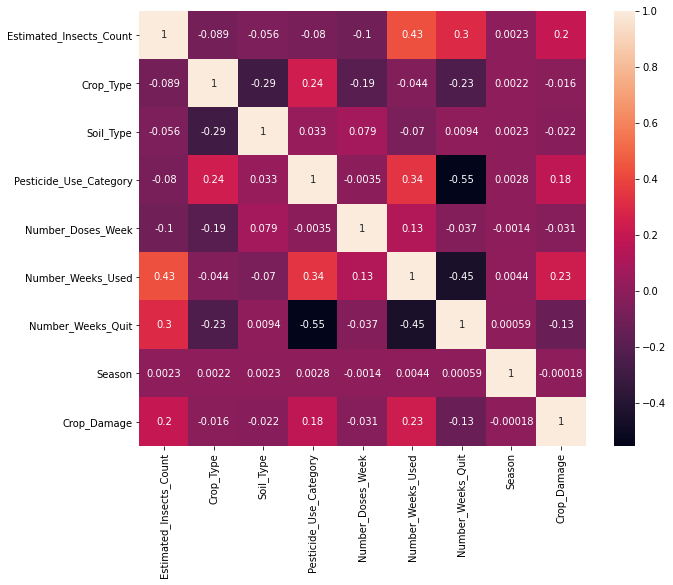

In [104]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True)

In [105]:
damage = train.groupby(by=("Crop_Damage")).sum().reset_index()
damage

,Crop_Damage,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,97675485,21460,34397,165520,1939040,1825397.0,750594,140847
1,1,22633880,3103,5354,29741,297535,382528.0,93911,23310
2,2,4004062,706,983,5930,60400,77928.0,7642,4403


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


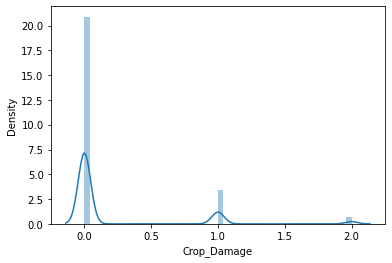

In [106]:
sns.distplot(train['Crop_Damage'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


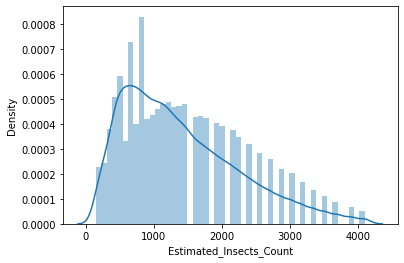

In [107]:
sns.distplot(train['Estimated_Insects_Count'])

In [108]:
insect = train.groupby(by=("Estimated_Insects_Count"))["Crop_Damage"].sum().reset_index()
insect

,Estimated_Insects_Count,Crop_Damage
0,150,13
1,151,2
2,168,12
3,169,2
4,188,10
...,...,...
66,3702,261
67,3895,159
68,3896,57
69,4096,111


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


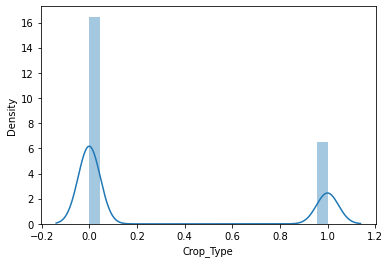

In [109]:
sns.distplot(train['Crop_Type'])

In [110]:
crop = train.groupby(by=("Crop_Type"))["Crop_Damage"].sum().reset_index()
crop

,Crop_Type,Crop_Damage
0,0,12418
1,1,4515


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


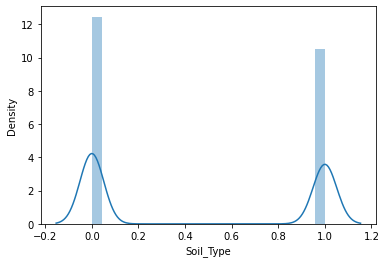

In [111]:
sns.distplot(train['Soil_Type'])

In [112]:
soil = train.groupby(by=("Soil_Type"))["Crop_Damage"].sum().reset_index()
soil

,Soil_Type,Crop_Damage
0,0,9613
1,1,7320


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


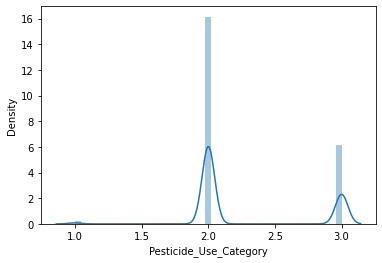

In [113]:
sns.distplot(train['Pesticide_Use_Category'])

In [114]:
pest = train.groupby(by=("Pesticide_Use_Category"))["Crop_Damage"].sum().reset_index()
pest

,Pesticide_Use_Category,Crop_Damage
0,1,884
1,2,7430
2,3,8619


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


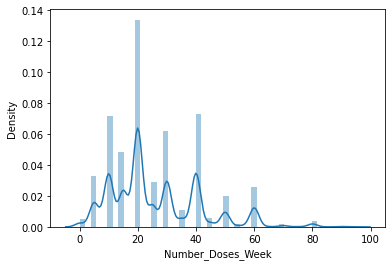

In [115]:
sns.distplot(train['Number_Doses_Week'])


In [116]:
dose = train.groupby(by=("Number_Doses_Week"))["Crop_Damage"].sum().reset_index()
dose

,Number_Doses_Week,Crop_Damage
0,0,884
1,5,553
2,10,1836
3,15,1190
4,20,5558
5,25,692
6,30,2061
7,35,215
8,40,2615
9,45,81


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


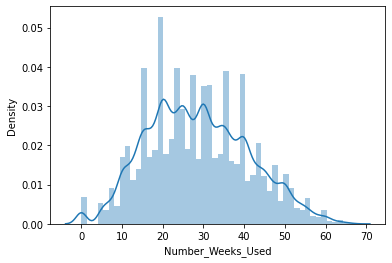

In [117]:
sns.distplot(train['Number_Weeks_Used'])


In [118]:
week = train.groupby(by=("Number_Weeks_Used"))["Crop_Damage"].sum().reset_index()
week

,Number_Weeks_Used,Crop_Damage
0,0.0,771
1,5.0,33
2,6.0,15
3,7.0,18
4,8.0,32
...,...,...
59,63.0,21
60,64.0,21
61,65.0,23
62,66.0,8


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


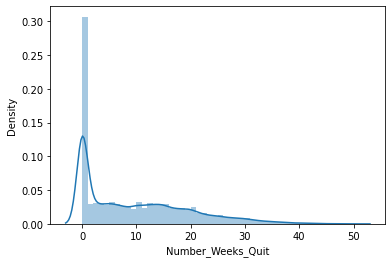

In [119]:
sns.distplot(train['Number_Weeks_Quit'])

In [120]:
quit = train.groupby(by=("Number_Weeks_Quit"))["Crop_Damage"].sum().reset_index()
quit

,Number_Weeks_Quit,Crop_Damage
0,0,9557
1,1,147
2,2,241
3,3,286
4,4,278
5,5,390
6,6,326
7,7,308
8,8,277
9,9,231


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


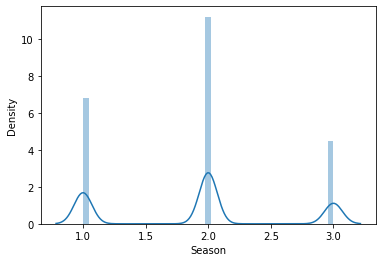

In [121]:
sns.distplot(train['Season'])

In [122]:
season = train.groupby(by=("Season"))["Crop_Damage"].sum().reset_index()
season

,Season,Crop_Damage
0,1,5070
1,2,8543
2,3,3320


Define X, y and X_test

In [123]:
#define x, y and x_test
ID = test.ID

y = train.Crop_Damage
X = train.drop(["ID", "Crop_Damage"], axis=1)
X_test = test.drop(["ID"], axis=1)

Create column transformer

In [124]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  int64  
 1   Crop_Type                88858 non-null  int64  
 2   Soil_Type                88858 non-null  int64  
 3   Pesticide_Use_Category   88858 non-null  int64  
 4   Number_Doses_Week        88858 non-null  int64  
 5   Number_Weeks_Used        79858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  int64  
 7   Season                   88858 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 5.4 MB


In [125]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

numeric_features = [0, 1, 2, 3, 4, 5, 6, 7]
numeric_transformer = Pipeline(steps=[('imputer', IterativeImputer(random_state=1)),
    ('scaler', StandardScaler())])

#categorical_features = ['Embarked', 'Sex', 'Pclass', 'Title']
#categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        #('cat', categorical_transformer, categorical_features)
        ])

In [126]:
#split training set for training and testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.10, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((79972, 8), (8886, 8), (79972,), (8886,), (59310, 8))

Create pipeline

In [127]:
!pip install catboost

In [128]:
from catboost import CatBoostClassifier

model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', CatBoostClassifier(loss_function='MultiClass', class_weights= [.21, .82, .97], iterations=3000, depth=10, random_state=1))]).fit(X_train, y_train)
print(model.score(X_train, y_train))

Learning rate set to 0.039103
0:	learn: 1.0742151	total: 131ms	remaining: 6m 32s
1:	learn: 1.0518582	total: 249ms	remaining: 6m 12s
2:	learn: 1.0314373	total: 372ms	remaining: 6m 11s
3:	learn: 1.0126341	total: 493ms	remaining: 6m 9s
4:	learn: 0.9951353	total: 610ms	remaining: 6m 5s
5:	learn: 0.9785738	total: 738ms	remaining: 6m 8s
6:	learn: 0.9635508	total: 853ms	remaining: 6m 4s
7:	learn: 0.9496648	total: 971ms	remaining: 6m 3s
8:	learn: 0.9367005	total: 1.09s	remaining: 6m 1s
9:	learn: 0.9243071	total: 1.2s	remaining: 5m 59s
10:	learn: 0.9129279	total: 1.32s	remaining: 5m 58s
11:	learn: 0.9021844	total: 1.44s	remaining: 5m 57s
12:	learn: 0.8924785	total: 1.55s	remaining: 5m 56s
13:	learn: 0.8833440	total: 1.68s	remaining: 5m 59s
14:	learn: 0.8747590	total: 1.8s	remaining: 5m 58s
15:	learn: 0.8667791	total: 1.92s	remaining: 5m 58s
16:	learn: 0.8589620	total: 2.04s	remaining: 5m 57s
17:	learn: 0.8517108	total: 2.16s	remaining: 5m 57s
18:	learn: 0.8449474	total: 2.27s	remaining: 5m 56s


In [129]:
#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model.get_params()
print(params)

{'memory': None, 'steps': [('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  IterativeImputer(add_indicator=False,
                                                                   estimator=None,
                                                                   imputation_order='ascending',
                                                                   initial_strategy='mean',
                                                                   max_iter=10,
                                                                   max_value=None,
                                                                   min_value=None,
                                                                   missing_valu

Predict on validation set

In [130]:
y_pred = model.predict(X_val)

df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred.ravel()})
df

,Actual,Predicted
30555,0,0
37993,0,0
72387,0,0
30750,1,1
6458,0,0
...,...,...
70597,1,0
85070,0,0
5794,1,0
86532,0,0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


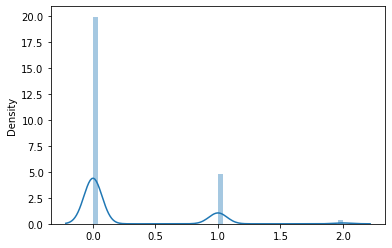

In [131]:
sns.distplot(y_pred)

In [132]:
import collections

print(collections.Counter(y_val))

Counter({0: 7424, 1: 1231, 2: 231})


In [133]:
print(collections.Counter(y_pred.ravel()))

Counter({0: 7073, 1: 1686, 2: 127})


In [134]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[6390,  972,   62],
       [ 612,  569,   50],
       [  71,  145,   15]])

In [135]:
#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_val, y_pred))
#Create DataFrame from confmtrx array 
#rows for test: Male, Female, Infant designation as index 
#columns for preds: male, predicted_female, predicted_infant as column
pd.DataFrame(confmtrx, index=['Alive','Other_Causes', 'Pesticides'],
columns=['predicted_Alive', 'predicted_Other_Causes', 'predicted_Pesticides'])


,predicted_Alive,predicted_Other_Causes,predicted_Pesticides
Alive,6390,972,62
Other_Causes,612,569,50
Pesticides,71,145,15


In [136]:
#Accuracy statistics
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred))  
#Create classification report
class_report=classification_report(y_val, y_pred)
print(class_report)

Accuracy Score: 0.7848300697726761
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7424
           1       0.34      0.46      0.39      1231
           2       0.12      0.06      0.08       231

    accuracy                           0.78      8886
   macro avg       0.45      0.46      0.45      8886
weighted avg       0.80      0.78      0.79      8886



In [137]:
predictions = model.predict(X_test)
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [138]:
submission = pd.DataFrame({
        "ID": ID,
        "Crop_Damage": predictions.ravel()
    })
submission.to_csv('submission.csv', index=False)
submission

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1
...,...,...
59305,F00155937,0
59306,F00155940,0
59307,F00155941,1
59308,F00155943,1
